In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__) #Corrected line

Tensorflow version: 2.19.0


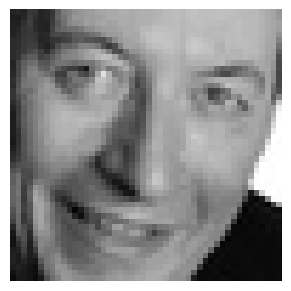

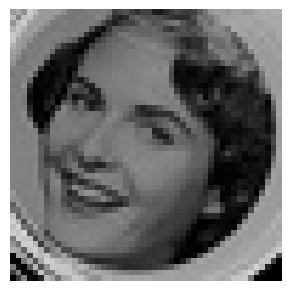

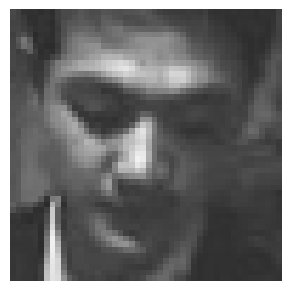

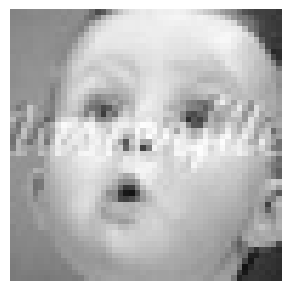

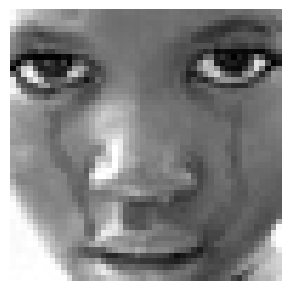

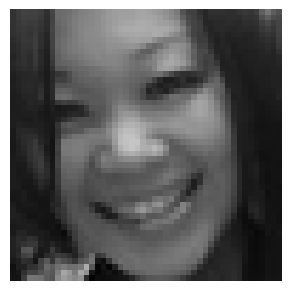

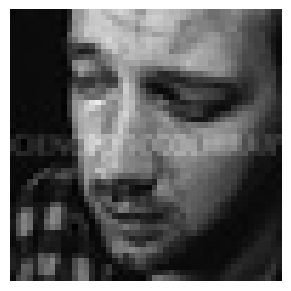

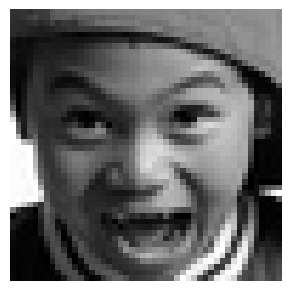

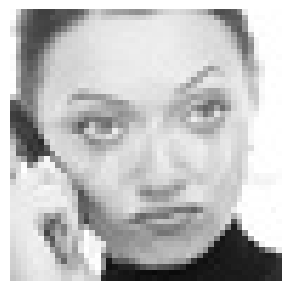

In [4]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random

images = glob(r"C:\Users\Lutifah\Downloads\archive (2)\train\*/*")  # Modified glob pattern

for i in range(9):
    image_path = random.choice(images)
    img = cv2.imread(image_path)
    if img is not None:
        plt.figure(figsize=(12, 12))
        plt.subplot(331 + i)
        plt.imshow(img)
        plt.axis('off')
    else:
        print(f"Warning: Could not read image at {image_path}")

In [5]:
# **Preparing data for Training**

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 48
batch_size = 64

# Use a raw string for the Windows path
train_data_dir = r'C:\Users\Lutifah\Downloads\archive (2)\train'

# Use a raw string for the Windows path
validation_data_dir = r'C:\Users\Lutifah\Downloads\archive (2)\test'

datagen_train = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(
    train_data_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

datagen_validation = ImageDataGenerator()

validation_generator = datagen_validation.flow_from_directory(
    validation_data_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**


In [6]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (5, 5))  # changed input to conv_1
    conv_3 = Convolution(conv_2, 128, (3, 3)) # changed input to conv_2

    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    output = Dense(7, activation="softmax")(dense_1)

    model = Model(inputs=inputs, outputs=output) # removed the brackets from inputs and outputs
    model.compile(loss=['categorical_crossentropy'], optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

model = model_fer((48, 48, 1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

**Initializing the Model**

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # Corrected import
epochs = 15
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(f"Training samples: {train_generator.samples}")
print(f"Batch size: {train_generator.batch_size}")
print(f"Steps per epoch: {steps_per_epoch}")

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
callbacks = [checkpoint, early_stopping]


Training samples: 28709
Batch size: 64
Steps per epoch: 448


**Training the Model**

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

C:\Users\Lutifah\.conda\envs\emotion_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3159 - loss: 1.8384
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 700s 2s/step - accuracy: 0.3160 - loss: 1.8380 - val_accuracy: 0.4353 - val_loss: 1.4912
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:28 333ms/step - accuracy: 0.5156 - loss: 1.3960

C:\Users\Lutifah\.conda\envs\emotion_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5156 - loss: 1.3960 - val_accuracy: 0.4262 - val_loss: 1.5118
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.4611 - loss: 1.4050
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 162s 363ms/step - accuracy: 0.4612 - loss: 1.4050 - val_accuracy: 0.4795 - val_loss: 1.3659
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:25 325ms/step - accuracy: 0.5312 - loss: 1.3849
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5312 - loss: 1.3849 - val_accuracy: 0.4841 - val_loss: 1.3533
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.5125 - loss: 1.2757
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 166s 371ms/step - accuracy: 0.5125 - loss: 1.2757 - val_accuracy: 0.5342 - val_loss: 1.2256
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:24 324ms/st

**Model Evaluation**


In [9]:
evaluation = model.evaluate(validation_generator)  # Corrected line
print(f'Validation Loss: {evaluation[0]}, Validation Accuracy: {evaluation[1]}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.5527 - loss: 1.1617
Validation Loss: 1.155337929725647, Validation Accuracy: 0.562134325504303


**Plotting loss**


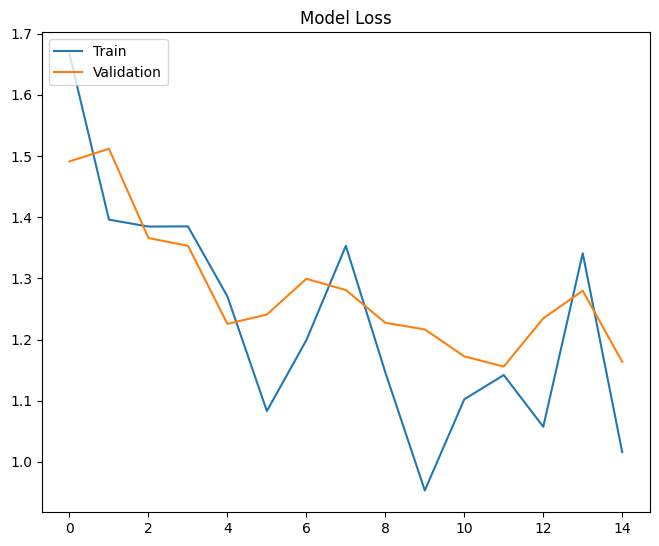

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.gcf().subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35) # corrected line.

plt.show() # added plt.show to display the plot.

**Plotting accuracy**

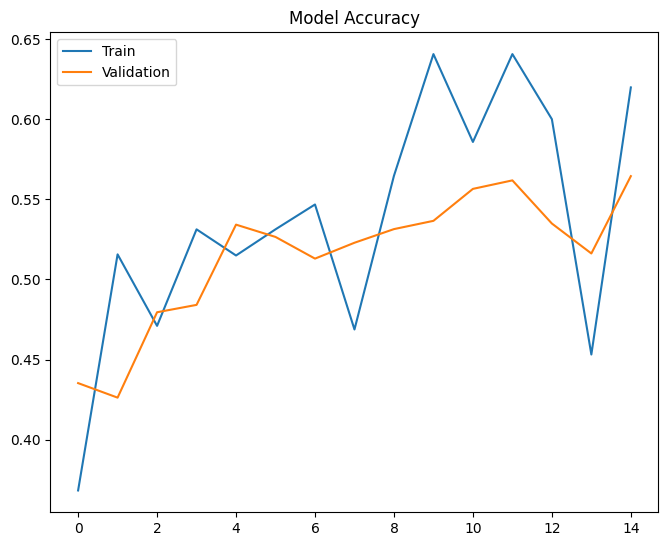

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy') # Corrected title
plt.legend(['Train', 'Validation'], loc='upper left')  # Corrected line
plt.gcf().subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show() # added plt.show to display the plot.

**Saving Model**


In [12]:
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)  # Corrected line (indented)

In [14]:
import os
print(os.path.exists("model_a.json"))  # Should print True
print(os.path.exists("model_weights1.h5"))  # Should print True


True
True


In [17]:
model.save_weights("model_weights1.weights.h5")  # Correct filename


In [18]:
loaded_model.load_weights("model_weights1.weights.h5")


In [20]:
print(loaded_model.input_shape)


(None, 48, 48, 1)


In [21]:
import numpy as np

# Generate a random test image with the correct shape
test_input = np.random.rand(1, 48, 48, 1)  # Batch size of 1, image size (48x48), 1 channel
prediction = loaded_model.predict(test_input)

print("Model Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Model Prediction: [[0.26369542 0.00191821 0.06874488 0.09121986 0.1775004  0.37483382
  0.02208739]]


In [22]:
predicted_class = np.argmax(prediction)  # Get the index of the highest value
print("Predicted Class:", predicted_class)


Predicted Class: 5


In [23]:
class_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
print("Predicted Emotion:", class_labels[predicted_class])


Predicted Emotion: Surprise
